<a href="https://colab.research.google.com/github/XZhangNH/XZhangNH/blob/Projects/NMA_project_pipeline_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pkg_resources
import os
import warnings
warnings.filterwarnings(action='once')

In [ ]:
!git clone --recurse-submodules https://github.com/ColeLab/ActflowToolbox.git

Cloning into 'ActflowToolbox'...
remote: Enumerating objects: 6761, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 6761 (delta 146), reused 130 (delta 49), pack-reused 6506
Receiving objects: 100% (6761/6761), 133.40 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (5859/5859), done.
Submodule 'dependencies/ColeAnticevicNetPartition' (https://github.com/ColeLab/ColeAnticevicNetPartition.git) registered for path 'dependencies/ColeAnticevicNetPartition'
Cloning into '/content/ActflowToolbox/dependencies/ColeAnticevicNetPartition'...
remote: Enumerating objects: 562, done.        
remote: Counting objects: 100% (14/14), done.        
remote: Compressing objects: 100% (8/8), done.        
remote: Total 562 (delta 7), reused 11 (delta 6), pack-reused 548        
Receiving objects: 100% (562/562), 120.22 MiB | 23.38 MiB/s, done.
Resolving deltas: 100% (342/342), done.
Submodule path 'dependencies/ColeAnticevicNetPartition

In [ ]:
!pip install nltools

     |████████████████████████████████| 3.3MB 2.9MB/s 
     |████████████████████████████████| 4.9MB 7.6MB/s 


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/deepdish-0.3.6.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/nilearn-0.8.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/nltools-0.4.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/pynv-0.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in 

In [ ]:
import ActflowToolbox as actflow
from nltools.utils import get_resource_path
from nltools.file_reader import onsets_to_dm
from nltools.data import Design_Matrix
import statsmodels.api as sm
from sklearn.preprocessing import scale

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

# Data download

In [ ]:
import urllib.request
import tarfile

In [ ]:
thetarfile = "https://osf.io/s4h8j/download/"
ftpstream = urllib.request.urlopen(thetarfile)
thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
thetarfile.extractall()

In [ ]:
thetarfile = "https://osf.io/bqp7m/download/"
ftpstream = urllib.request.urlopen(thetarfile)
thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
thetarfile.extractall()

# Basic Parameters

In [ ]:
HCP_DIR = "./hcp_task"
if not os.path.isdir(HCP_DIR):
  os.mkdir(HCP_DIR)
# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 339

# The data have already been aggregated into ROIs from the Glasesr parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in sec

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated multiple times in each subject
N_RUNS_REST = 4
N_RUNS_TASK = 2

# Time series data are organized by experiment, with each experiment
# having an LR and RL (phase-encode direction) acquistion
BOLD_NAMES = [
  "rfMRI_REST1_LR", "rfMRI_REST1_RL",
  "rfMRI_REST2_LR", "rfMRI_REST2_RL",
  "tfMRI_MOTOR_RL", "tfMRI_MOTOR_LR",
  "tfMRI_WM_RL", "tfMRI_WM_LR",
  "tfMRI_EMOTION_RL", "tfMRI_EMOTION_LR",
  "tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR",
  "tfMRI_LANGUAGE_RL", "tfMRI_LANGUAGE_LR",
  "tfMRI_RELATIONAL_RL", "tfMRI_RELATIONAL_LR",
  "tfMRI_SOCIAL_RL", "tfMRI_SOCIAL_LR"
]


#Dictionaries 
conditions_dict={
    "motor": ["cue", "rf", "lf", "rh", "lh"],
    "wm": ["0bk_body", "0bk_faces", "0bk_places", "0bk_tools", "2bk_body", 
           "2bk_faces", "2bk_places", "2bk_tools"],
    "emotion": ["fear", "neut"],
    "gambling": ["win", "loss"],
    "language": ["story", "math"],
    "relational": ["match", "relation"],
    "social": ["mental", "rnd"]}

run_length_dict = {
    "motor": 284,
    "wm": 405,
    "emotion": 176,
    "gambling": 253,
    "language": 316,
    "relational": 232,
    "social": 274}

bold_name_dict = {
    "rest": ["rfMRI_REST1_LR", "rfMRI_REST1_RL", "rfMRI_REST2_LR", "rfMRI_REST2_RL"],
    "motor": ["tfMRI_MOTOR_RL", "tfMRI_MOTOR_LR"],
    "wm": ["tfMRI_WM_RL", "tfMRI_WM_LR"],
    "emotion": ["tfMRI_EMOTION_RL", "tfMRI_EMOTION_LR"],
    "gambling": ["tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR"],
    "language": ["tfMRI_LANGUAGE_RL", "tfMRI_LANGUAGE_LR"],
    "relational": ["tfMRI_RELATIONAL_RL", "tfMRI_RELATIONAL_LR"],
    "social": ["tfMRI_SOCIAL_RL", "tfMRI_SOCIAL_LR"]}

task_run_dict = {
    "rest": [1,2,3,4],
    "motor": [5,6],
    "wm": [7,8],
    "emotion": [9,10],
    "gambling": [11,12],
    "language": [13, 14],
    "relational": [15, 16],
    "social": [17, 18]}

# Helper Functions

In [ ]:
def get_cond_evs(cond_name, task_name, subject, run = 1):
  """Load onset files for a single condition from a task.
  
  Args:
    cond_name (str): condition name pulled from the conditions_dict for task_name
    task_name (str): task name instead of the bold run
    subject (int): 0-based subject ID to load
    run (int): 1 or 2 for task runs (use run-1 for indexing)

  Returns
    cond_evs (n_blocks x 3): Events file for single condition to be formatted for design matrix

  """
  bold_name = bold_name_dict[task_name][run-1]
  cond_evs = pd.read_csv('%s/subjects/%s/EVs/%s/%s.txt'%(HCP_DIR, subject, bold_name, cond_name), sep="\t", header=None)
  cond_evs = cond_evs.rename(columns={0: "Onset", 1: "Duration", 2: "amplitude"})
  cond_evs = cond_evs.drop(columns=['amplitude'])
  cond_evs['Stim'] = cond_name

  return cond_evs

def get_run_evs(subject, task_name, run = 1):
  """Load onset files for a full file.
  
  Args:
    task_name (str): task name instead of the bold run
    subject (int): 0-based subject ID to load
    run (int): 1 or 2 for task runs (use run-1 for indexing)

  Returns
    evs (n_blocks for run x 3 array): Events file for single condition to be formatted for design matrix

  """

  conditions = conditions_dict[task_name]

  evs = pd.DataFrame()

  for cond in conditions:
    cond_evs = get_cond_evs(cond, task_name, subject, run)
    evs = evs.append(cond_evs)
  
  evs = evs.sort_values(by="Onset") 

  return evs

def run_evs_to_dm(run_evs, task_name, TR=.72, convolve = True, add_poly = 2, dct_basis=False):

  sampling_freq = 1./TR
  run_length = run_length_dict[task_name]
  dm = onsets_to_dm(run_evs, sampling_freq=sampling_freq, run_length=run_length, sort=True, add_poly=add_poly)

  if convolve: 
    dm = dm.convolve()

  if dct_basis:
    dm = dm.add_dct_basis()

  return dm

def get_task_dms(subject, task_name, TR = .72, convolve = True, add_poly = 2, dct_basis=False):

  runs = list(range(1,len(task_run_dict[task_name])+1))
  task_dm = Design_Matrix(sampling_freq=1./TR)

  for run in runs:
    run_evs = get_run_evs(subject=subject, task_name=task_name, run=run)
    run_dm = run_evs_to_dm(run_evs=run_evs, task_name=task_name, add_poly=add_poly, dct_basis=dct_basis)
    task_dm = task_dm.append(run_dm)

  return task_dm

def load_run_timeseries(subject, task_name, run = 1, remove_mean=True, scale_ts=True):
  """Load timeseries data for a single subject and single run.
  
  Args:
    subject (int): 0-based subject ID to load
    task_name (str): task name instead of the bold run
    run (int): 1 or 2 for task runs
    remove_mean (bool): If True, subtract the parcel-wise mean

  Returns
    ts (n_parcel x n_timepoint array): Array of BOLD data values

  """
  bold_run = task_run_dict[task_name][run-1]

  bold_path = f"{HCP_DIR}/subjects/{subject}/timeseries"
  bold_file = f"bold{bold_run}_Atlas_MSMAll_Glasser360Cortical.npy"
  ts = np.load(f"{bold_path}/{bold_file}")
  if remove_mean:
    ts -= ts.mean(axis=1, keepdims=True)

  if scale_ts:
    #scales each parcel's timeseries (instead of scaling the bold for one 1 TR from all parcels)
    ts = scale(ts, axis=1)
  return ts

def load_task_timeseries(subject, task_name, remove_mean=True, scale_ts = True):
  
  runs = list(range(1,len(task_run_dict[task_name])+1))
  task_ts = np.empty((360, 0))

  for run in runs:
    #since everything is loaded by run and scale_ts is true each parcel should be 
    #scaled for each parcel and for each run separately before being concatenated together
    cur_run_ts = load_run_timeseries(subject=subject, task_name=task_name, run=run)
    task_ts = np.append(task_ts, cur_run_ts, axis=1)
  
  return task_ts

def get_sub_task_resids(subject, task_name):
 
  #load task data
  task_ts = load_task_timeseries(subject=subject, task_name=task_name)

  #make design matrix
  task_dm = get_task_dms(subject=subject, task_name=task_name)

  #initialize empty variables to store data in
  run_length = run_length_dict[task_name]
  num_runs = len(task_run_dict[task_name])
  resids = np.empty((0, num_runs*run_length))

  #loop through parcels, run regression and extract residuals
  for parcel in range(len(task_ts)):
    model = sm.OLS(task_ts[parcel], task_dm)
    results = model.fit()
    cur_resids = np.array([results.resid])
    resids = np.append(resids, cur_resids, axis=0)

  #store parcel residuals in same format as original BOLD
  out_dir = './hcp/residuals/%s'%(task_name)
  if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

  out_fn = '%s_%s_Glasser360Cortical.npy'%(task_name, str(subject))

  np.save(os.path.join(out_dir, out_fn), resids)

  return resids

def load_fcs(task_name, fc_type):
  
  base_dir = '/content/drive/My Drive/Colab Notebooks'

  if fc_type == "resid":
    fc_dir = os.path.join(base_dir, 'residual_fcs')
  
  elif fc_type == "task":
    fc_dir = os.path.join(base_dir, 'task_preds_fcs')

  elif fc_type == "rest":
    fc_dir = os.path.join(base_dir, 'rest_fcs')

  input_dir = os.path.join(fc_dir, task_name)
  fcs_list = os.listdir(input_dir)
  fcs = np.zeros((360, 360, len(fcs_list)))

  for i, fc in enumerate(fcs_list):
    fcs[:,:,i] = np.load(os.path.join(input_dir, fc))

  return fcs

def get_sub_task_pred(subject, task_name):
 
  #load task data
  task_ts = load_task_timeseries(subject=subject, task_name=task_name)

  #make design matrix
  task_dm = get_task_dms(subject=subject, task_name=task_name)
  task_regs = task_dm.iloc[:,:len(conditions_dict[task_name])]

  #initialize empty variables to store data in
  run_length = run_length_dict[task_name]
  num_runs = len(task_run_dict[task_name])
  preds = np.empty((0, num_runs*run_length))

  #loop through parcels, run regression and extract residuals
  for parcel in range(len(task_ts)):
    model = sm.OLS(task_ts[parcel], task_dm)
    results = model.fit()
    task_coefs = results.params[:len(conditions_dict[task_name])]
    cur_preds = np.zeros(num_runs*run_length)
    for i in range(len(conditions_dict['emotion'])):
      cur_preds += task_coefs[i]*task_regs.iloc[:,i]
    cur_preds = np.array(cur_preds).reshape(1, -1)
    preds = np.append(preds, cur_preds, axis=0)

  #store parcel residuals in same format as original BOLD
  out_dir = './hcp/task_preds/%s'%(task_name)
  if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

  out_fn = '%s_%s_Glasser360Cortical.npy'%(task_name, str(subject))

  np.save(os.path.join(out_dir, out_fn), preds)

  return preds

# Load region information

In [ ]:
regions = np.load('./hcp_task/regions.npy').T
region_info = dict(
    name=regions[0].tolist(),
    network=regions[1],
    myelin=regions[2].astype(np.float),
)

In [ ]:
networkpartition_dir = pkg_resources.resource_filename('ActflowToolbox.dependencies', 'ColeAnticevicNetPartition/')
networkdef = np.loadtxt(networkpartition_dir + '/cortex_parcel_network_assignments.txt')
networkorder = np.asarray(sorted(range(len(networkdef)), key=lambda k: networkdef[k]))
networkorder.shape = (len(networkorder),1)
netorder=networkorder[:,0]

In [ ]:
network_dict = {1: 'Visual1', 
       2: 'Visual2', 
       3:'Somatomotor',
       4:'Cingulo-Oper',
       5:'Language',
       6:'Default',
       7:'Frontopariet',
       8:'Auditory',
       9:'Posterior-Mu',
       10:'Dorsal-atten',
       11:'Ventral-Mult',
       12:'Orbito-Affec'}

# Pipeline testing

## Testing parameters

In [ ]:
subject = 2
task_name = 'relational'
run = 1

## Single run GLM

In [ ]:
run_evs = get_run_evs(subject=subject, task_name = task_name, run = run)
run_evs

,Onset,Duration,Stim
0,7.996,16.0,relation
0,26.482,16.0,match
1,61.001,16.0,match
1,79.580,16.0,relation
2,113.953,16.0,match
2,132.559,16.0,relation


In [ ]:
events = run_evs[['Stim', 'Onset', 'Duration']]
events

,Stim,Onset,Duration
0,relation,7.996,16.0
0,match,26.482,16.0
1,match,61.001,16.0
1,relation,79.580,16.0
2,match,113.953,16.0
2,relation,132.559,16.0


In [ ]:
import numpy as np
tr = 1.0  # repetition time is 1 second
n_scans = 128  # the acquisition comprises 128 scans
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times

In [ ]:
add_reg_names = ['tx', 'ty', 'tz', 'rx', 'ry', 'rz']

In [ ]:
hrf_model = 'glover'
from nilearn.glm.first_level import make_first_level_design_matrix
X1 = make_first_level_design_matrix(events, drift_model='polynomial', drift_order=3, add_reg_names=add_reg_names, hrf_model=hrf_model)

ValueError: ignored

In [ ]:
type(run_evs)

pandas.core.frame.DataFrame

In [ ]:
onset = run_evs['Onset']

In [ ]:
type(onset)

pandas.core.series.Series

In [ ]:
onset = run_e

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/nltools/file_reader.py:141: UserWarning: Computed onsets for match are inconsistent with expected values. Please manually verify the outputted Design_Matrix!
  f"Computed onsets for {data.Stim.unique()[i]} are inconsistent with expected values. Please manually verify the outputted Design_Matrix!"


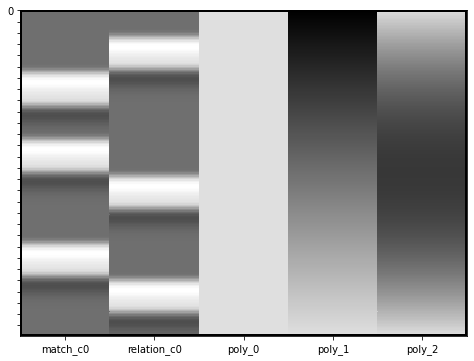

In [ ]:
dm = run_evs_to_dm(run_evs, task_name = task_name)
dm.heatmap()

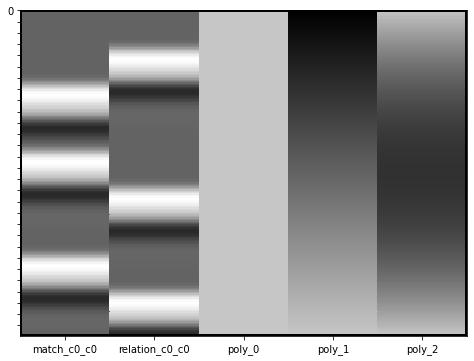

In [ ]:
dm_c = dm.convolve()
dm_c.heatmap()

In [ ]:
bold_data = load_run_timeseries(subject=subject, task_name=task_name, run=run)

In [ ]:
mod = sm.OLS(scale(bold_data[0]), dm_c)
res = mod.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.118
Date:                Mon, 19 Jul 2021   Prob (F-statistic):             0.0160
Time:                        14:21:07   Log-Likelihood:                -322.99
No. Observations:                 232   AIC:                             656.0
Df Residuals:                     227   BIC:                             673.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
match_c0_c0        0.2830      0.122      2.321      0.021       0.043       0.523
relation_c0_c0     0.3019      0.123      2.464      0.014       0.060       0.543
poly_0            -0.1781      0.091     -1.948      0.053      -0.358       0.002
poly_1             0.0455      0.112      0.406      0.685      -0.175       0.266
poly_2            -0.2488      0.148     -1.683      0.094      -0.540       0.043
==============================================================================
Omnibus:                        1.081   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.082
Skew:                          -0.048   Prob(JB):                        0.582
Kurtosis:                       2.680   Cond. No.                         2.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Task GLM

In [ ]:
task_bold = load_task_timeseries(subject=subject, task_name=task_name)

In [ ]:
task_dm = get_task_dms(subject=subject, task_name=task_name)

/usr/local/lib/python3.7/dist-packages/nltools/file_reader.py:141: UserWarning: Computed onsets for match are inconsistent with expected values. Please manually verify the outputted Design_Matrix!
  f"Computed onsets for {data.Stim.unique()[i]} are inconsistent with expected values. Please manually verify the outputted Design_Matrix!"


In [ ]:
parcel = 0
model = sm.OLS(task_bold[parcel], task_dm)
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     167.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          1.42e-121
Time:                        14:21:07   Log-Likelihood:                -363.47
No. Observations:                 464   AIC:                             742.9
Df Residuals:                     456   BIC:                             776.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
match_c0        1.6355      0.057     28.920      0.000       1.524       1.747
relation_c0     1.5779      0.055     28.923      0.000       1.471       1.685
0_poly_0       -0.9644      0.045    -21.289      0.000      -1.053      -0.875
0_poly_1        0.1302      0.061      2.150      0.032       0.011       0.249
0_poly_2        0.0865      0.079      1.088      0.277      -0.070       0.243
1_poly_0       -0.9578      0.045    -21.206      0.000      -1.047      -0.869
1_poly_1       -0.1713      0.061     -2.830      0.005      -0.290      -0.052
1_poly_2        0.1936      0.080      2.435      0.015       0.037       0.350
==============================================================================
Omnibus:                       13.265   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.951
Skew:                           0.333   Prob(JB):                      0.00254
Kurtosis:                       2.581   Cond. No.                         3.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def get_cond_evs(cond_name, task_name, subject, run = 1, hcp_task_dir = './hcp_task'):
    
    bold_name = bold_name_dict[task_name][run-1]
    cond_evs = pd.read_csv('%s/subjects/%s/EVs/%s/%s.txt'%(hcp_task_dir, subject, bold_name, cond_name), sep="\t", header=None)
    cond_evs = cond_evs.rename(columns={0: "Onset", 1: "Duration", 2: "amplitude"})
    cond_evs = cond_evs.drop(columns=['amplitude'])
    cond_evs['Stim'] = cond_name
    
    return cond_evs

def get_run_evs(subject, task_name, run = 1):
    
    conditions = conditions_dict[task_name]
    evs = pd.DataFrame()
    for cond in conditions:
        cond_evs = get_cond_evs(cond, task_name, subject, run)
        evs = evs.append(cond_evs)
    
    evs = evs.sort_values(by="Onset") 
    return evs

def run_evs_to_dm(run_evs, task_name, TR=.72, convolve = True, add_poly = 2, dct_basis=False):

    sampling_freq = 1./TR
    run_length = run_length_dict[task_name]
    dm = onsets_to_dm(run_evs, sampling_freq=sampling_freq, run_length=run_length, sort=True, add_poly=add_poly)
    
    if convolve: 
        dm = dm.convolve()
    
    if dct_basis:
        dm = dm.add_dct_basis()

    return dm

def get_task_dms(subject, task_name, TR = .72, convolve = True, add_poly = 2, dct_basis=False):
    
    runs = list(range(1,len(task_run_dict[task_name])+1))
    task_dm = Design_Matrix(sampling_freq=1./TR)
    
    for run in runs:
        run_evs = get_run_evs(subject=subject, task_name=task_name, run=run)
        run_dm = run_evs_to_dm(run_evs=run_evs, task_name=task_name, add_poly=add_poly, dct_basis=dct_basis)
        task_dm = task_dm.append(run_dm)
        
    return task_dm

def load_run_timeseries(subject, task_name, run = 1, remove_mean=True, scale_ts=True):
    
    bold_run = task_run_dict[task_name][run-1]
    
    if task_name == 'rest':
        HCP_DIR = './hcp_rest'
    else:
        HCP_DIR='./hcp_task'

    bold_path = f"{HCP_DIR}/subjects/{subject}/timeseries"
    bold_file = f"bold{bold_run}_Atlas_MSMAll_Glasser360Cortical.npy"
    ts = np.load(f"{bold_path}/{bold_file}")
    if remove_mean:
        ts -= ts.mean(axis=1, keepdims=True)

    if scale_ts:
    #scales each parcel's timeseries (instead of scaling the bold for one 1 TR from all parcels)
        ts = scale(ts, axis=1)
    
    return ts

def load_task_timeseries(subject, task_name, remove_mean=True, scale_ts = True):
  
    runs = list(range(1,len(task_run_dict[task_name])+1))
    task_ts = np.empty((360, 0))

    for run in runs:
    #since everything is loaded by run and scale_ts is true each parcel should be 
    #scaled for each parcel and for each run separately before being concatenated together
        cur_run_ts = load_run_timeseries(subject=subject, task_name=task_name, run=run)
        task_ts = np.append(task_ts, cur_run_ts, axis=1)
  
    return task_ts

def get_sub_task_resids_and_preds(subject, task_name):
 
    #load task data
    task_ts = load_task_timeseries(subject=subject, task_name=task_name)

    #make design matrix
    task_dm = get_task_dms(subject=subject, task_name=task_name)
    task_regs = task_dm.iloc[:,:len(conditions_dict[task_name])]

    #initialize empty variables to store data in
    run_length = run_length_dict[task_name]
    num_runs = len(task_run_dict[task_name])
    resids = np.empty((0, num_runs*run_length))
    preds = np.empty((0, num_runs*run_length))

    #loop through parcels, run regression and extract residuals
    for parcel in range(len(task_ts)):
        model = sm.OLS(task_ts[parcel], task_dm)
        results = model.fit()
    
        cur_resids = np.array([results.resid])
        resids = np.append(resids, cur_resids, axis=0)
    
        task_coefs = results.params[:len(conditions_dict[task_name])]
        cur_preds = np.zeros(num_runs*run_length)
        for i in range(len(conditions_dict[task_name])):
            cur_preds += task_coefs[i]*task_regs.iloc[:,i]
        cur_preds = np.array(cur_preds).reshape(1, -1)
        preds = np.append(preds, cur_preds, axis=0)

    #save task residuals
    out_dir = './output/residuals/%s'%(task_name)
    if not os.path.isdir(out_dir):
        os.makedirs(out_dir)
    out_fn = '%s_%s_Glasser360Cortical.npy'%(task_name, str(subject))
    np.save(os.path.join(out_dir, out_fn), resids)

    #save task predictions
    out_dir = './output/task_preds/%s'%(task_name)
    if not os.path.isdir(out_dir):
        os.makedirs(out_dir)
    out_fn = '%s_%s_Glasser360Cortical.npy'%(task_name, str(subject))
    np.save(os.path.join(out_dir, out_fn), preds)
    
    return resids, preds

def get_sub_fc(subject, task_name, fc_type, base_dir = './output'):
    
    if fc_type == "residual":
        ts_dir = os.path.join(base_dir, 'residuals')
        fc_dir = os.path.join(base_dir, 'residual_fcs')
  
    elif fc_type == "task_preds":
        ts_dir = os.path.join(base_dir, 'task_preds')
        fc_dir = os.path.join(base_dir, 'task_preds_fcs')

    elif fc_type == "rest":
        fc_dir = os.path.join(base_dir, 'rest_fcs')
    
    if not os.path.exists(fc_dir):
        os.makedirs(fc_dir)
        
    if task_name != 'rest':
        ts = np.load(os.path.join(ts_dir, task_name, task_name+'_'+subject+'_Glasser360Cortical.npy'))
    else:
        ts = load_task_timeseries(subject=subject, task_name=task_name)
    
    sub_fc = np.corrcoef(ts)
    out_dir = os.path.join(fc_dir, task_name)
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    out_fn = '%s_%s_%s_fc.npy'%(task_name, str(subject), fc_type)
    np.save(os.path.join(out_dir, out_fn), sub_fc)

    return sub_fc

def load_sub_fc(task_name, fc_type, subject, base_dir = './output'):
    
    if fc_type == "residual":
        fc_dir = os.path.join(base_dir, 'residual_fcs')
  
    elif fc_type == "task_preds":
        fc_dir = os.path.join(base_dir, 'task_preds_fcs')

    elif fc_type == "rest":
        fc_dir = os.path.join(base_dir, 'rest_fcs')

    input_dir = os.path.join(fc_dir, task_name)
    fcs_list = os.listdir(input_dir)
    
    fn = '%s_%s_%s_fc.npy'%(task_name, str(subject), fc_type)

    fc = np.load(os.path.join(input_dir, fn))

    return fc

def load_fcs(task_name, fc_type, base_dir = './output'):
    
    if fc_type == "residual":
        fc_dir = os.path.join(base_dir, 'residual_fcs')
  
    elif fc_type == "task_preds":
        fc_dir = os.path.join(base_dir, 'task_preds_fcs')

    elif fc_type == "rest":
        fc_dir = os.path.join(base_dir, 'rest_fcs')

    input_dir = os.path.join(fc_dir, task_name)
    fcs_list = sorted(os.listdir(input_dir))
    fcs = np.zeros((360, 360, len(fcs_list)))

    for i, fc in enumerate(fcs_list):
        fcs[:,:,i] = np.load(os.path.join(input_dir, fc))

    return fcs


def sort_evals_descending(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors

def fc_pca(fc_mat):
  
  # Calculate the eigenvalues and eigenvectors
    evals, evectors = np.linalg.eigh(fc_mat)
  # Sort the eigenvalues in descending order
    evals, evectors = sort_evals_descending(evals, evectors)
  # Project the data onto the new eigenvector basis
    #score = np.matmul(X, W)

    return evectors, evals

In [ ]:
subjects = os.listdir('./hcp_task/subjects')
subjects = [i for i in subjects if i.startswith('.') == False]
subjects[:10]

['226', '313', '39', '133', '268', '93', '270', '208', '56', '279']

In [ ]:
task_names = ["relational"]
for task_name in task_names:
  print("Starting residual calculations for task_name: %s"%(task_name))
  for subject in subjects:
    sub_res, sub_pred = get_sub_task_resids_and_preds(subject = subject, task_name=task_name)

Starting residual calculations for task_name: relational


/usr/local/lib/python3.7/dist-packages/nltools/file_reader.py:141: UserWarning: Computed onsets for match are inconsistent with expected values. Please manually verify the outputted Design_Matrix!
  f"Computed onsets for {data.Stim.unique()[i]} are inconsistent with expected values. Please manually verify the outputted Design_Matrix!"
/usr/local/lib/python3.7/dist-packages/nltools/file_reader.py:141: UserWarning: Computed onsets for relation are inconsistent with expected values. Please manually verify the outputted Design_Matrix!
  f"Computed onsets for {data.Stim.unique()[i]} are inconsistent with expected values. Please manually verify the outputted Design_Matrix!"
/usr/local/lib/python3.7/dist-packages/nltools/file_reader.py:141: UserWarning: Computed onsets for relation are inconsistent with expected values. Please manually verify the outputted Design_Matrix!
  f"Computed onsets for {data.Stim.unique()[i]} are inconsistent with expected values. Please manually verify the outputted

In [ ]:
 subjects = os.listdir('./hcp_rest/subjects')
 subjects = [i for i in subjects if i.startswith('.') == False]
 for subject in subjects:
     sub_res = get_sub_fc(subject = subject, task_name="rest", fc_type="rest")

In [ ]:
task_names = ["relational"]

pc_loads = pd.DataFrame()

for task_name in task_names:
    evecs, evals = fc_pca(resid_rest_fcs_ave[task_name])
    tmp =  pd.DataFrame(data={"pc1_loading": evecs[:,0],"pc2_loading": evecs[:,1],"pc3_loading": evecs[:,2], 
                              "network": region_info['network'][netorder]})
    tmp = tmp.melt(id_vars=['network'])
    tmp = tmp.astype({'network': 'category', 'variable': 'category'})
    tmp['task_name'] = task_name
    pc_loads = pc_loads.append(tmp)

NameError: ignored